In [60]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [93]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,snack week,turkey,rating_0.0,rating_1.25,rating_1.875,rating_2.5,rating_3.125,rating_3.75,rating_4.375,rating_5.0
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,1,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
2,Potato and Fennel Soup Hodge,3.75,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,1,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,0


In [12]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [102]:
raw_data.rating = raw_data.rating.astype(str)

In [114]:
raw_data.rating.describe()

count     20052
unique        8
top       4.375
freq       8019
Name: rating, dtype: object

In [15]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [111]:
from sklearn.svm import SVC
svc = SVC()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)

C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

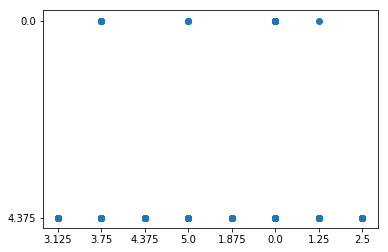

In [105]:
plt.scatter(Y, svc.predict(X))

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, svc.predict(X))

array([[  53,    0,    0,    0,    0,    0,  511,    0],
       [   1,    0,    0,    0,    0,    0,   53,    0],
       [   0,    0,    0,    0,    0,    0,   37,    0],
       [   0,    0,    0,    0,    0,    0,  168,    0],
       [   0,    0,    0,    0,    0,    0,  449,    0],
       [   5,    0,    0,    0,    0,    0, 1507,    0],
       [   0,    0,    0,    0,    0,    0, 2390,    0],
       [   3,    0,    0,    0,    0,    0,  839,    0]], dtype=int64)

In [106]:
svc.score(X, Y)

0.4060837765957447

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)

C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
